# Task 4.9 – Part 2: Data Visualization and Analysis

In this notebook, I'll create visualizations using the merged Instacart dataset. These charts help analyze customer behavior and guide marketing and operational strategies.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Load cleaned and merged dataset
df = pd.read_pickle('df_merged_4_9.pkl')

## Bar Chart: Loyalty Flag
This chart shows how customers are distributed across loyalty segments.

In [3]:
print(df.columns)

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Gender', 'STATE', 'Age', 'date_joined',
       'dependants', 'marital_status', 'income'],
      dtype='object')


In [4]:
# Loyalty flag by number of orders
def loyalty_flag(row):
    if row['order_number'] > 40:
        return 'Loyal customer'
    elif row['order_number'] > 10:
        return 'Regular customer'
    else:
        return 'New customer'

df['loyalty_flag'] = df.apply(loyalty_flag, axis=1)

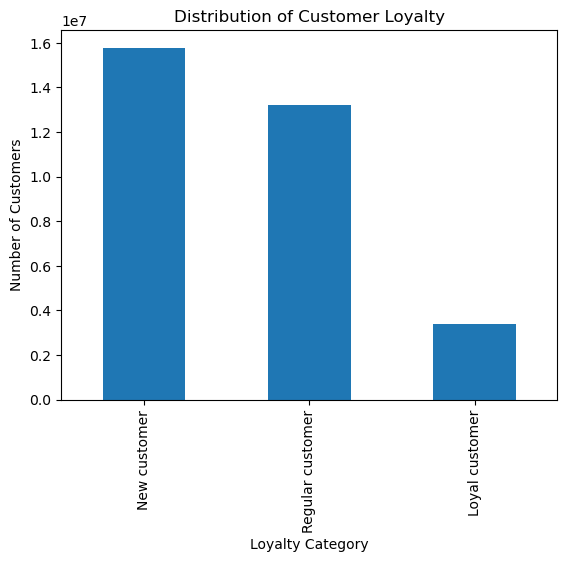

In [5]:
df['loyalty_flag'].value_counts().plot(kind='bar') 
plt.title('Distribution of Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.savefig('/Users/canancengel/A4_Instacart Basket Analysis/03_Analysis/Visualizations/loyalty_flag_bar.png')
plt.show()

## Histogram: Order Hour of Day
This histogram shows the frequency of orders throughout the day.

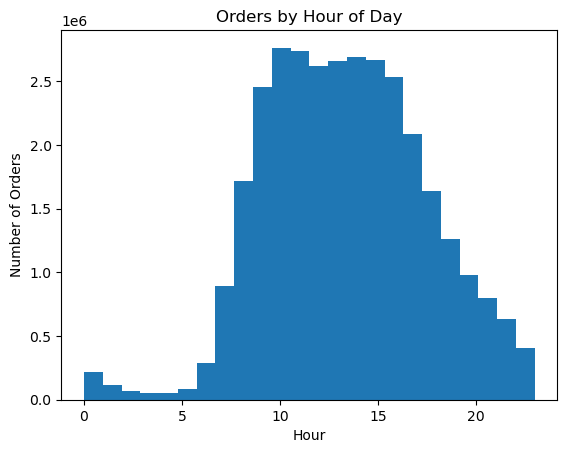

In [6]:
df['order_hour_of_day'].plot.hist(bins=24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.savefig('/Users/canancengel/A4_Instacart Basket Analysis/03_Analysis/Visualizations/order_hour_hist.png')
plt.show()

**Observation:**  
Most orders are placed during the late morning and early afternoon, particularly between 10:00 and 14:00.

## Line Chart: Average Price by Hour of Day  
This line chart shows how average expenditure changes across different times of day.

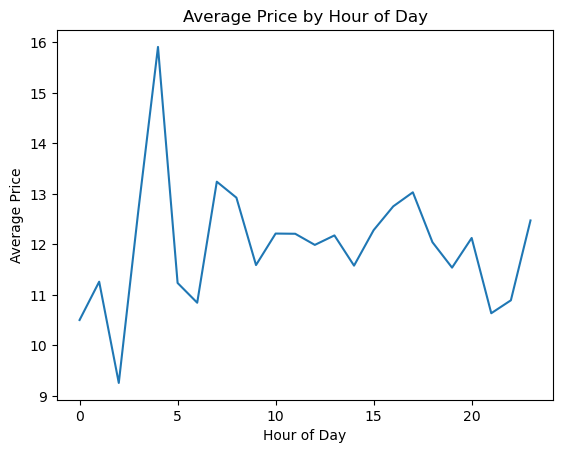

In [7]:
# Set a seed for reproducibility
np.random.seed(4)

# Subset: %30
sample = df[np.random.rand(len(df)) < 0.3]

# Average price per hour
hourly_spending = sample.groupby('order_hour_of_day')['prices'].mean()

# Plot
hourly_spending.plot()
plt.title('Average Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.savefig('/Users/canancengel/A4_Instacart Basket Analysis/03_Analysis/Visualizations/avg_price_hour_line.png')
plt.show()

**Observation:**  
Average spending per product remains fairly consistent across the day, but slight increases are observed in the evening hours.

## Line Chart: Age vs Number of Dependants  
This line chart explores how the number of dependants varies with age.

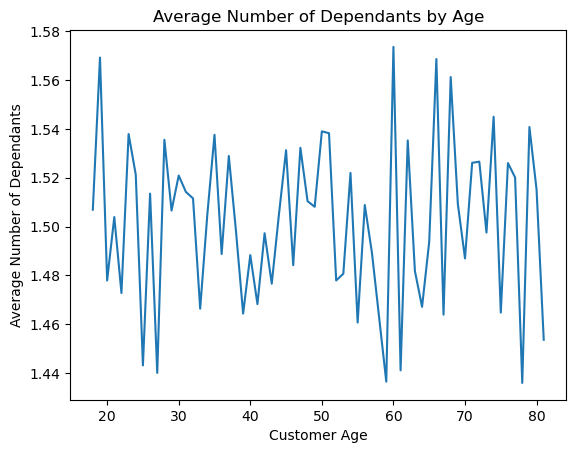

In [8]:
# Grouping by age and calculating mean dependants
age_dependants = df.groupby('Age')['dependants'].mean()

# Plotting
age_dependants.plot()
plt.title('Average Number of Dependants by Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Number of Dependants')
plt.savefig('/Users/canancengel/A4_Instacart Basket Analysis/03_Analysis/Visualizations/age_dependants_line.png')
plt.show()

**Observation:**  
Younger adults and middle-aged customers tend to have more dependants, while older customers generally have fewer.

## Scatterplot: Age vs Income  
This scatterplot visualizes the relationship between customer age and annual income.

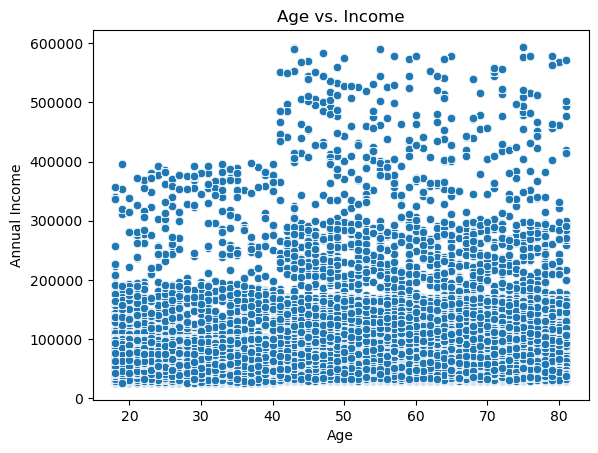

In [9]:
# Scatterplot using seaborn
sns.scatterplot(data=df, x='Age', y='income')

# Plot labels
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.savefig('/Users/canancengel/A4_Instacart Basket Analysis/03_Analysis/Visualizations/age_income_scatter.png')
plt.show()

**Observation:**  
While there is a general increase in income with age, the relationship flattens and becomes more dispersed among middle-aged and older customers.